# Scikit Learn

Scikit learn is a poplar data science library that gives us access to data sets, algorithms, data visualizing tools, control over computing resources and more. 

The main function of scikit learn will be the algorithms. This will allows us to leverage other people's code, so we do not have to make everything from scratch. This saves us a ton of time, and give us results faster. It is important to understand how these algorithms work, but from this point forward, it will be more "exploring" than deep diving into each algorithm.

<iframe src="https://giphy.com/embed/Kc2HdK1uGEIQBaOX2O" width="480" height="480" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/think-brain-mind-Kc2HdK1uGEIQBaOX2O">via GIPHY</a></p>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from sklearn.linear_model import LinearRegression



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
x_data = [1, 1.2, 1.5, 2, 2.3, 2.4, 3.1, 3.4, 3.6, 4, 4.7, 5]
y_data = [6.321, 5.011, 6.259, 8.118, 8.35, 11.437, 12.869, 13.905, 15.535, 16.65, 19.814, 19.408]
np_x_data = np.array(x_data).reshape(-1, 1)
np_y_data = np.array(y_data).reshape(-1, 1)

# The one line
reg = LinearRegression().fit(np_x_data, np_y_data)
# Lets look at the data
print("Score: ", reg.score(np_x_data, np_y_data))
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

# Previous Values
# m = 3.8479091841970217
# b = 1.0065421583718237


Score:  0.9709953995439389
Coefficients:  [[3.84790918]]
Intercept:  [1.00654216]


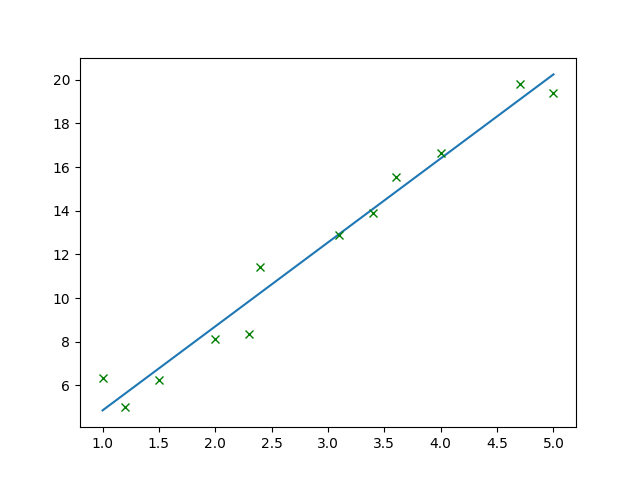

In [3]:
# The plot

y_hat = reg.coef_ * np_x_data + reg.intercept_

plt.figure()
plt.plot(x_data, y_hat, '-', x_data, y_data, 'xg')

# An example

Steps

1. Unzip the Data 
2. Extract Data from file
3. Look at the data
4. Sort the data into datasets
5. Fit the data 
6. Using test data determine if its a good fit
7. Visualize
8. Summarize

In [4]:
# Imports # Note some of these are imported again for clarity

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib ipympl
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import zipfile as zip

In [5]:
# Unzip the Data
with zip.ZipFile('catsM.zip', 'r') as zip:
    zip.extractall('catsM')

In [6]:
# Extra the data from a file
df_cat_data = pd.read_csv("./catsM/catsM.csv")

In [7]:
# Look at data 
print("Visualize some data\n", df_cat_data.head)
print("Data Index: ", df_cat_data.index)
print("Data Shape: ", df_cat_data.shape)
print("Data Colum Names: ", df_cat_data.columns)
# Note at this point you may want to check for any None or NaN values 


Visualize some data
 <bound method NDFrame.head of     Unnamed: 0 Sex  Bwt   Hwt
0            1   M  2.0   6.5
1            2   M  2.0   6.5
2            3   M  2.1  10.1
3            4   M  2.2   7.2
4            5   M  2.2   7.6
..         ...  ..  ...   ...
92          93   M  3.7  11.0
93          94   M  3.8  14.8
94          95   M  3.8  16.8
95          96   M  3.9  14.4
96          97   M  3.9  20.5

[97 rows x 4 columns]>
Data Index:  RangeIndex(start=0, stop=97, step=1)
Data Shape:  (97, 4)
Data Colum Names:  Index(['Unnamed: 0', 'Sex', 'Bwt', 'Hwt'], dtype='object')


Body Weight Description: 
 count    97.000000
mean      2.900000
std       0.467484
min       2.000000
25%       2.500000
50%       2.900000
75%       3.200000
max       3.900000
Name: Bwt, dtype: float64
Heart Weight Description: 
 count    97.000000
mean     11.322680
std       2.542288
min       6.500000
25%       9.400000
50%      11.400000
75%      12.800000
max      20.500000
Name: Hwt, dtype: float64


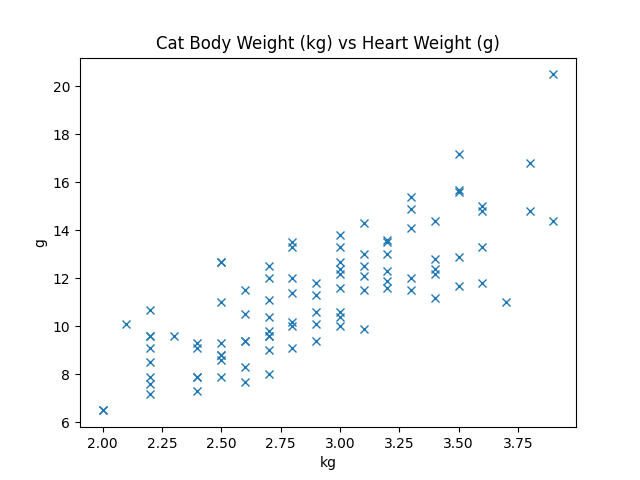

In [8]:
# Look at Data
print("Body Weight Description: \n", df_cat_data["Bwt"].describe())
print("Heart Weight Description: \n", df_cat_data["Hwt"].describe())

plt.figure()
plt.plot(df_cat_data["Bwt"], df_cat_data["Hwt"], "x")
plt.title("Cat Body Weight (kg) vs Heart Weight (g)")
plt.xlabel("kg")
plt.ylabel("g")
plt.show()

In [9]:
# This looks like a great fit for linear regression!

# Sort data into datasets 
x_train, x_test, y_train, y_test = train_test_split(df_cat_data["Bwt"].to_frame(), df_cat_data["Hwt"].to_frame(), test_size = 0.20, random_state=10)

print(type(x_train))
print("Training Shape: ", x_train.shape)
print("Testing Shape: ", x_test.shape)



<class 'pandas.core.frame.DataFrame'>
Training Shape:  (77, 1)
Testing Shape:  (20, 1)


In [10]:
# Fit the data
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [11]:
# Use test to determine if its a good fit
print("R Score against test data: ",  lr_model.score(x_test, y_test))

R Score against test data:  0.6155464452080013


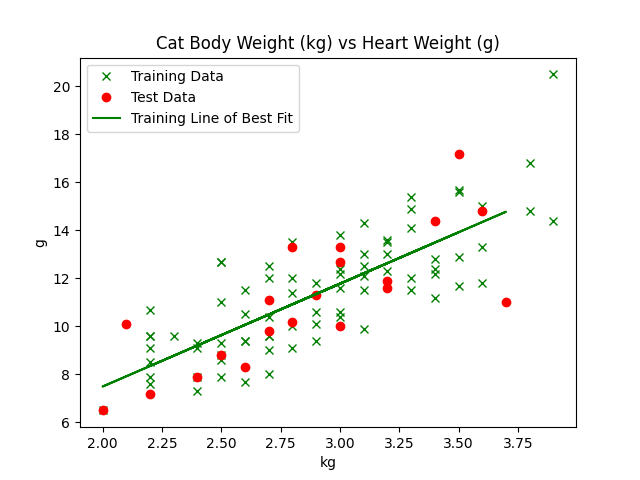

In [12]:

# Visualize the results

y_out = lr_model.coef_ * x_test + lr_model.intercept_

plt.figure()
plt.plot(x_train, y_train, 'gx', x_test, y_test, "ro", x_test, y_out, 'g-', )
plt.legend(["Training Data", "Test Data", "Training Line of Best Fit"])
plt.title("Cat Body Weight (kg) vs Heart Weight (g)")
plt.xlabel("kg")
plt.ylabel("g")
plt.show()

### Summarize

Here you would put a summary of your results - I will summarize the data to you verbally in class. 

Things to think about:
- Does this fit into my problem statement?
- What could I do with this information?
- Does this information make sense? Does it contradict my expected results?
- How can I improve my model's accuracy, are there features I might not be including that play a large role? (Gender of cat?)
- Where there biases collected for this data? How was the data collected? When was it collected?

# References and taking it further

// TODO: Format these URLS

https://library.virginia.edu/data/articles/logistic-regression-four-ways-with-python

https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/cats.html

https://www.kaggle.com/datasets/ukveteran/weight-data-for-domestic-cats